___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Session - 2<br><br>Installing Tensorflow & Keras Syntax Basics<br><br>Fake Reg<br><h1>

# Installing Tensorflow

In [85]:
#conda update --all 

Note: you may need to restart the kernel to use updated packages.



The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2021.11=py39_0
  - defaults/win-64::astropy==4.3.1=py39hc7d831d_0
  - defaults/win-64::matplotlib==3.4.3=py39haa95532_0
  - defaults/win-64::scikit-image==0.18.3=py39hf11a4ad_0
  - defaults/win-64::scikit-learn-intelex==2021.3.0=py39haa95532_0
  - defaults/noarch::seaborn==0.11.2=pyhd3eb1b0_0



Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\uksal\anaconda3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.05  |           py39_0           7 KB
    aiohttp-3.8.1              |   py39h2bbff1b_1         496 KB
    aiosignal-1.2.0            |     pyhd3eb1b0_0          12 KB
    anaconda-custom            |           py39_1           4 KB
    anaconda-client-1.11.0     |   py39haa95532_0         165 KB
    anaconda-navigator-2.3.0   |   py39haa95532_0         5.3 MB
    anaconda-project-0.11.1    |   py39haa95532_0         511 KB
    anyio-3.5.0                |   py39haa95532_0         167 KB
    argon2-cffi-21.3.0         |     pyhd3eb1b0_0          15 KB
    argon2-cffi-bindings-21.2.0|   py39h2bbff1b_0          36 KB
    arrow-1.2.2                |     pyhd3eb1b0_0          92 KB
    asttokens-2.0.5         

In [86]:
!python --version

Python 3.9.13


In [2]:
# pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
#df = pd.read_csv("drive/MyDrive/Colab_Files/data/fake_reg.csv")

In [4]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [5]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [7]:
df.describe().T
# sayisal degerler birbirine yakin ama asagida görsellestirince farkli geldi

,count,mean,std,min,25%,50%,75%,max
price,1000.000,498.673,93.785,223.347,433.026,502.382,564.922,774.408
feature1,1000.000,1000.014,0.974,997.058,999.332,1000.010,1000.638,1003.208
feature2,1000.000,999.980,0.948,996.996,999.316,1000.002,1000.645,1002.666


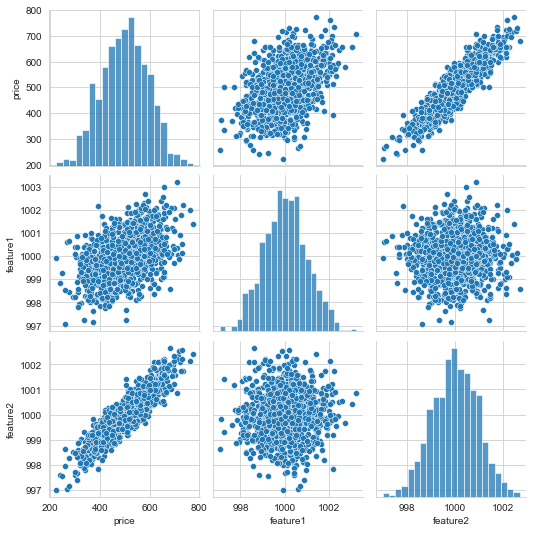

In [8]:
sns.pairplot(df);
# f1 ve f2 arasinda yuvarlagimsi bir sekil var. bu da aralarinda bir iliski olmadigi yada cok zayif oldugu anlamina gelir
# f2 price arasinda güclü bir iliski var denebilir
# f1 price arasinda daha zayif

In [9]:
df.corr()

,price,feature1,feature2
price,1.000,0.444,0.908
feature1,0.444,1.000,0.031
feature2,0.908,0.031,1.000


## Preprocessing of Data
- Train | Test Split, Scalling

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# X = df[['feature1', 'feature2']].values  # convert to array
# y = df['price'].values
# böyle de alabilirim. array olarak döner. asagida DataFrame

In [11]:
X = df[['feature1', 'feature2']] 
y = df['price']

In [12]:
X

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339
...,...,...
995,1000.019,999.673
996,998.855,1000.020
997,1001.452,998.848
998,1000.771,998.563


In [13]:
y

0     461.528
1     548.130
2     410.297
3     540.382
4     546.025
        ...  
995   476.526
996   457.313
997   456.721
998   403.316
999   599.367
Name: price, Length: 1000, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [15]:
X_train.shape

(700, 2)

In [16]:
X_test.shape

(300, 2)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bool, default=True
 |      Set to Fal

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [44]:
import tensorflow as tf

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
# Input, Dense => layer'lar

In [46]:
# help(Sequential)

In [47]:
# help(Dense)

In [48]:
X_train.shape

(700, 2)

In [49]:
# First way to create model

model = Sequential([Input(shape = X_train.shape[1]),  # feature sayisini aliyorum
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 4, activation = "relu"),
                    Dense(units = 1)])  # activation yazmazsam default olarak linear

In [50]:
# Second way to create model (recommended)

model = Sequential()
#model.add(Input(shape = X_train.shape[1]))  # yada asagidaki gibi kodun icine
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))  # activation yazmazsam default olarak linear

In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 4)                 12        
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 4)                 20        
                                                                 
 dense_15 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.8369098 ,  0.4356072 ,  0.8116336 ,  0.48443675],
        [-0.32693815,  0.36810994, -0.39188933,  0.45799327]],
       dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.48680454, -0.2695706 ,  0.30740434, -0.6576662 ],
        [-0.5679158 ,  0.33998388, -0.46367508,  0.79749125],
        [-0.5918708 , -0.19116384,  0.28148037, -0.32761222],
        [-0.36939067,  0.00479871,  0.6181808 , -0.12713689]],
       dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_14/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.02936363, -0.39487565,  0.3575272 ,  0.7136114 ],
        [ 0.73379487,  0.56374866,  0.319897  , -0.8319297 ],
        [ 0.80529386, -0.33323085,  0

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [53]:
model.compile(optimizer = "rmsprop", loss = "mse")

In [54]:
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)
# batch_size icin 2nin katlari tavsiye edilir

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256696.7500
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 256641.2344
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 256590.0781
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256529.5469
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 256458.8594
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 256377.3906
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256283.4531
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 256176.4062
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 256053.8281
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 255914.8594
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 255758.4219
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 2ms/step - loss: 61.4752
Epoch 194/250
22/22 [==============================] - 0s 2ms/step - loss: 57.6010
Epoch 195/250
22/22 [==============================] - 0s 2ms/step - loss: 53.7452
Epoch 196/250
22/22 [==============================] - 0s 2ms/step - loss: 49.6462
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 46.8949
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 43.5751
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 41.1726
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 38.6107
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 36.9625
Epoch 202/250
22/22 [==============================] - 0s 2ms/step - loss: 34.8989
Epoch 203/250
22/22 [==============================] - 0s 2ms/step - loss: 33.8337
Epoch 204/250
22/22 [==============================] - 0s 2ms/step - loss: 32.1732
Epoch 205/250
22/2

In [55]:
model.weights

[<tf.Variable 'dense_12/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[-0.8369098 ,  1.8660386 ,  1.8071084 ,  1.8334192 ],
        [-0.32693815,  4.0601225 ,  2.872015  ,  4.091406  ]],
       dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.90436566, 0.4776545 , 0.84277415], dtype=float32)>,
 <tf.Variable 'dense_13/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.48680454, -0.2695706 ,  0.30740434, -0.6576662 ],
        [-0.5679158 ,  2.6799452 ,  1.8463752 ,  3.1742766 ],
        [-0.5918708 ,  1.9308783 ,  2.2527587 ,  1.8335109 ],
        [-0.36939067,  2.3785217 ,  2.9620564 ,  2.2823598 ]],
       dtype=float32)>,
 <tf.Variable 'dense_13/bias:0' shape=(4,) dtype=float32, numpy=array([0.        , 0.8543616 , 0.82952756, 0.8890822 ], dtype=float32)>,
 <tf.Variable 'dense_14/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[-0.02936363, -0.39487565,  0.3575272 ,  0.7136114 ],
        [ 0.36121887,  0.56374866, 

In [56]:
model.history.history  # loss degerleri

{'loss': [256696.75,
  256641.234375,
  256590.078125,
  256529.546875,
  256458.859375,
  256377.390625,
  256283.453125,
  256176.40625,
  256053.828125,
  255914.859375,
  255758.421875,
  255581.9375,
  255382.609375,
  255159.984375,
  254911.40625,
  254634.1875,
  254324.046875,
  253978.21875,
  253595.40625,
  253172.34375,
  252701.25,
  252183.640625,
  251617.140625,
  250997.71875,
  250325.125,
  249586.484375,
  248787.046875,
  247922.921875,
  246986.0625,
  245976.296875,
  244895.765625,
  243732.9375,
  242476.203125,
  241144.9375,
  239719.90625,
  238190.875,
  236569.921875,
  234846.109375,
  233021.578125,
  231089.9375,
  229042.8125,
  226864.828125,
  224569.984375,
  222169.890625,
  219653.0,
  216999.390625,
  214206.359375,
  211308.234375,
  208268.0625,
  205062.109375,
  201742.265625,
  198263.859375,
  194667.703125,
  190913.65625,
  187031.71875,
  183021.703125,
  178849.28125,
  174534.34375,
  170099.015625,
  165523.6875,
  160813.9375,
  155

In [57]:
pd.DataFrame(model.history.history)

,loss
0,256696.750
1,256641.234
2,256590.078
3,256529.547
4,256458.859
...,...
245,24.432
246,24.438
247,24.195
248,24.036


<AxesSubplot:>

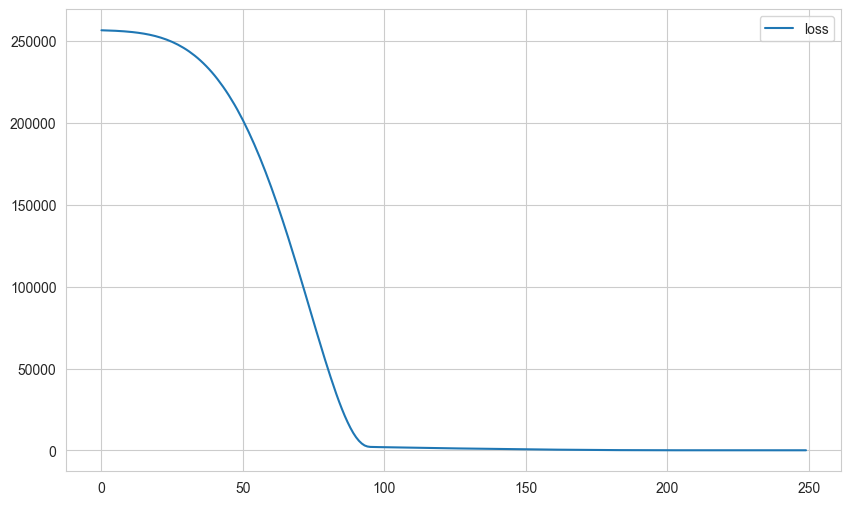

In [58]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 3000.0)

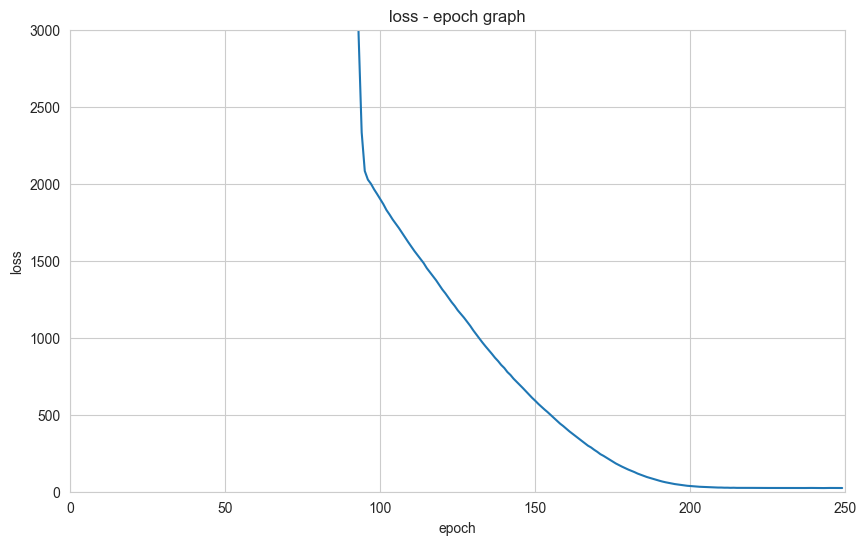

In [59]:
fig, ax= plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("epoch")
ax.set_ylabel("loss")
ax.set_title("loss - epoch graph")
ax.set_xlim([0, 250]) # focusing on the given x values
ax.set_ylim([0, 3000]) # focusing on the given y values

## Model Performance

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [61]:
model.evaluate(X_train, y_train, verbose=0)

24.90619468688965

In [62]:
model.evaluate(X_test, y_test, verbose=0)

27.31380844116211

In [63]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 2ms/step


(300, 1)

In [64]:
y_test.shape

(300,)

In [65]:
y_pred.reshape(-1,).shape

(300,)

In [66]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
88,441.950,437.498
916,577.317,579.566
479,477.321,472.368
918,367.161,363.137
429,526.448,530.378
823,649.440,642.715
529,594.687,602.069
557,396.050,405.837
643,637.859,633.940
355,411.184,416.679


<AxesSubplot:xlabel='Actual', ylabel='Pred'>

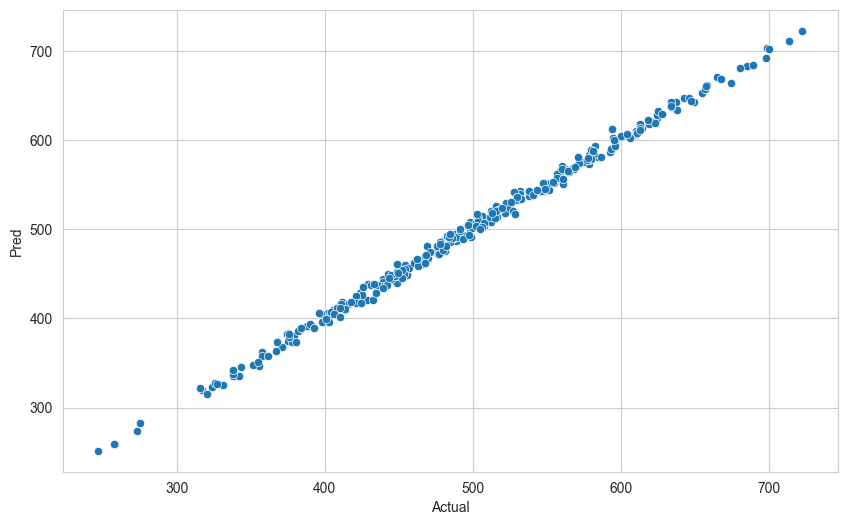

In [67]:
sns.scatterplot(x = 'Actual', y = 'Pred', data = compare)

In [68]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [69]:
eval_metric(y_test, y_pred)

r2_score: 0.9968933447403885 
mae: 4.241255572397679 
mse: 27.313811416025388 
rmse: 5.22626170565782


## Final Model and Model Deployment

### Final Model Training

In [70]:
scaler = MinMaxScaler().fit(X)

In [71]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg", 'wb'))

In [72]:
X_scaled = scaler.transform(X)

In [73]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu"))     # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")

final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 256797.1406
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 256318.2344
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 255737.3750
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 255022.1406
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 254157.7969
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 253112.9062
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 251827.7031
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 250219.5625
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 248266.8750
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 245944.2344
Epoch 11/250
32/32 [==============================] - 0s 2ms/step - loss: 243205.4375
Epoch 12/250
32/32 [==============================] - 0s 2ms/st

32/32 [==============================] - 0s 2ms/step - loss: 25.0888
Epoch 197/250
32/32 [==============================] - 0s 2ms/step - loss: 24.8998
Epoch 198/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7128
Epoch 199/250
32/32 [==============================] - 0s 2ms/step - loss: 25.3115
Epoch 200/250
32/32 [==============================] - 0s 2ms/step - loss: 24.6873
Epoch 201/250
32/32 [==============================] - 0s 2ms/step - loss: 24.7509
Epoch 202/250
32/32 [==============================] - 0s 3ms/step - loss: 24.9923
Epoch 203/250
32/32 [==============================] - 0s 2ms/step - loss: 24.9987
Epoch 204/250
32/32 [==============================] - 0s 2ms/step - loss: 24.5279
Epoch 205/250
32/32 [==============================] - 0s 2ms/step - loss: 24.9927
Epoch 206/250
32/32 [==============================] - 0s 2ms/step - loss: 25.2040
Epoch 207/250
32/32 [==============================] - 0s 2ms/step - loss: 25.1416
Epoch 208/250
32/3

### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [74]:
final_model.save('model_fake_reg.h5')  # creates a HDF5 file 'my_model.h5'

In [69]:
#final_model.save("model_fake_reg") 

### Loading Model

In [75]:
from tensorflow.keras.models import load_model

In [76]:
model_fake_reg = load_model('model_fake_reg.h5')

In [77]:
scaler_fake_reg = pickle.load(open("scaler_fake_reg", "rb"))

## Prediction-1

In [78]:
sample = [[998, 1000]]

In [79]:
sample_scaled = scaler_fake_reg.transform(sample)

In [80]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 96ms/step


array([[421.05167]], dtype=float32)

## Prediction-2

In [81]:
my_dict = {"Feature1": [997, 998, 999, 1000, 1001],
           "Feature2": [1000, 999, 998, 997, 996]}

In [82]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [83]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [84]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 32ms/step


array([[380.76578],
       [332.30368],
       [283.84164],
       [235.3796 ],
       [199.63687]], dtype=float32)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___